In [43]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1FT-A2smlmAYRhEwcPypQdNcEB0EzPNmn')
!pip install jovian --upgrade --quiet


In [ ]:
import numpy as np
from keras.datasets.mnist import load_data


from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
from numpy import vstack
from numpy import ones
from numpy import zeros
from numpy.random import rand,randn
from numpy.random import randint
from numpy import expand_dims

from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from matplotlib import pyplot

In [ ]:
!pip install jovian

     |████████████████████████████████| 71kB 2.2MB/s 
  Created wheel for uuid: filename=uuid-1.30-cp36-none-any.whl size=6503 sha256=3eb88e65240e1f25f8a7fd3c239cd1d5e1825751ec3d8338d63fe597124132a2
  Stored in directory: /root/.cache/pip/wheels/2a/80/9b/015026567c29fdffe31d91edbe7ba1b17728db79194fca1f21
Successfully built uuid


In [ ]:
import jovian

In [ ]:
#construct descrimator
def descrimator_section(input_dimention=(28,28,1)):

  model_descriminator = Sequential()
  
  model_descriminator.add(Conv2D(124,(3,3),strides=(2, 2),padding='same',input_shape=input_dimention))
  model_descriminator.add(LeakyReLU(alpha=0.2))
  model_descriminator.add(Dropout(0.4))
 
  model_descriminator.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
  model_descriminator.add(LeakyReLU(alpha=0.2))
  model_descriminator.add(Dropout(0.4))
 
  model_descriminator.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
  model_descriminator.add(LeakyReLU(alpha=0.2))
  model_descriminator.add(Dropout(0.4))
  
  model_descriminator.add(Flatten())
  model_descriminator.add(Dense(1, activation='sigmoid'))
	
  opt = Adam(lr=0.0002, beta_1=0.5)
  model_descriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  return (model_descriminator)



 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 124)       1240      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 124)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 124)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          71488     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)         

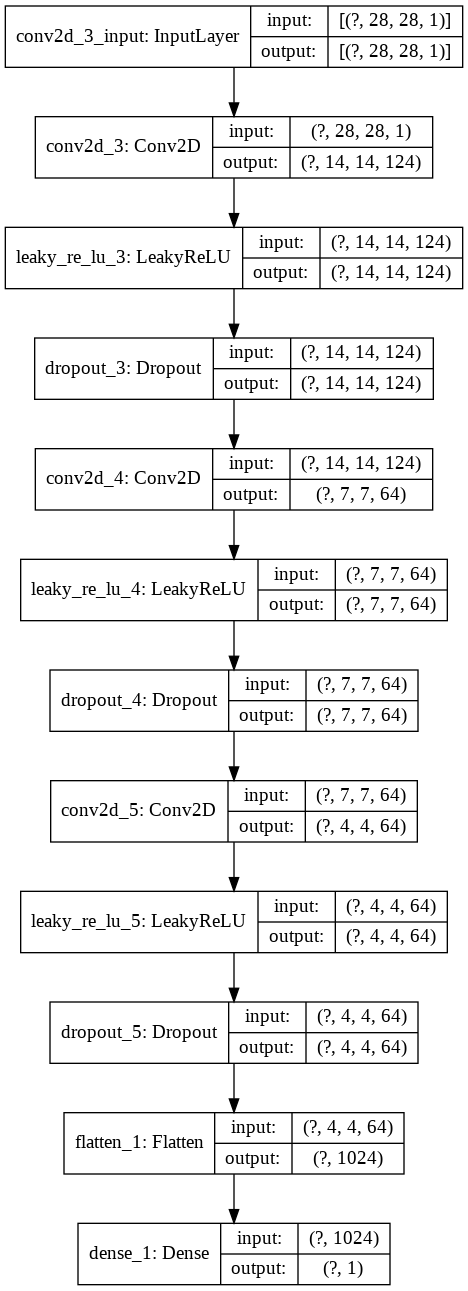

In [ ]:
initiate_discriminator=descrimator_section()
initiate_discriminator.summary()
#link with drive and save the model flowchart
plot_model(initiate_discriminator, show_shapes=True, show_layer_names=True)

In [ ]:
##dataset preparation


def loading_dataset():

  (trainx, trainy), (testx, testy) = load_data()
  dataset=expand_dims(trainx, axis=-1)
  dataset = dataset.astype('float32')
  dataset=dataset/255.0
  return (dataset)


def produce_real_dataset(dataset,numofsamples):

    dataset_shape=dataset.shape
    noof_random_index= randint(0, dataset_shape[0], numofsamples)
    dataset_original=dataset[noof_random_index]

    dataset_original_label=ones((numofsamples,1))

    return (dataset_original,dataset_original_label)

def generate_latent_space(latent_dimentions,n_samples):

	latent_points = randn(latent_dimentions * n_samples)
	latent_points = latent_points.reshape(n_samples, latent_dimentions)
 
	return latent_points 


def produce_fake_samples(model_generator,latent_dimentions,numofsamples,sizeofimage=28):


   input_to_generator=generate_latent_space(latent_dimentions,numofsamples)
   output_from_generator=model_generator.predict(input_to_generator)
   dataset_fake_sampel=output_from_generator
   output_from_generator=output_from_generator/255.0
   dataset_fake_labels=zeros((numofsamples,1))

   return (dataset_fake_sampel,dataset_fake_labels)










In [ ]:
##training module descriminator

def training_for_descriminator(model_descriminator_train,dataset, epochs=100,batches=256):
    
     half_batch=int(batches/2)

     for cycles in range(0,epochs):

       real_samples,real_labels=produce_real_dataset(dataset,half_batch)
       _, real_sample_accuracy = model_descriminator_train.train_on_batch(real_samples,real_labels)

       fake_samples,fake_labels=produce_fake_samples(half_batch)
       _, fake_sample_accuracy = model_descriminator_train.train_on_batch(fake_samples,fake_labels)

       print('Epoch: %d real sample accuracy = %.0f%% , fake sample accuracy = %.0f%%' % (cycles+1, real_sample_accuracy*100, fake_sample_accuracy*100 ))





In [ ]:
#implementation of descrimonator part of gans
dataset=loading_dataset()
#training_for_descriminator(initiate_discriminator, dataset)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
def generator_section(latent_dimention=150,nodes = 128 * 7 * 7):

    model_generator = Sequential()
	
    model_generator.add(Dense(nodes, input_dim=latent_dimention))
    model_generator.add(LeakyReLU(alpha=0.2))
    model_generator.add(Reshape((7, 7, 128)))
	  
    model_generator.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model_generator.add(LeakyReLU(alpha=0.2))
 
    model_generator.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding='same'))
    model_generator.add(LeakyReLU(alpha=0.2)) 


	
    model_generator.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))

    return (model_generator)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6272)              947072    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 6272)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 64)        131136    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 28, 28, 64)       

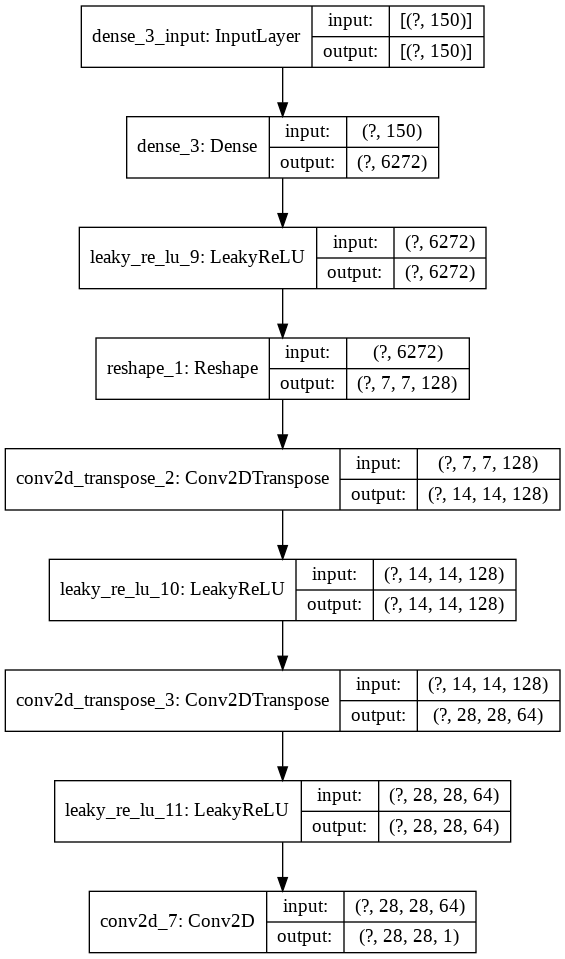

In [ ]:
latent_dimention=150
initiate_generator=generator_section(latent_dimention)
initiate_generator.summary()
plot_model(initiate_generator, show_shapes=True, show_layer_names=True)

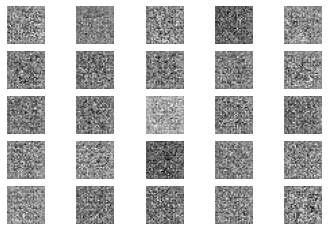

In [ ]:
latent_dimention=150
initiate_generator=generator_section(latent_dimention)
n_samples = 25
sample_output_test, _ =  produce_fake_samples(initiate_generator, latent_dimention, n_samples)

for i in range(n_samples):
	
	pyplot.subplot(5, 5, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(sample_output_test[i, :, :, 0], cmap='gray_r')
pyplot.show()

In [ ]:
def combine_generator_disreminator_model(generator_model, discreminotor_model):
	
    discreminotor_model.trainable = False
    
    model_GANS = Sequential()
    
    model_GANS.add(generator_model)
	
    model_GANS.add(discreminotor_model)

    opt = Adam(lr=0.0002, beta_1=0.5)
    model_GANS.compile(loss='binary_crossentropy', optimizer=opt)

    return (model_GANS)





In [ ]:
def model_Gans(generator_model, descriminator_model):
	
	descriminator_model.trainable = False
	
	GANS = Sequential()

	GANS .add(generator_model)

	GANS .add(descriminator_model)

	opt = Adam(lr=0.0002, beta_1=0.5)
	GANS.compile(loss='binary_crossentropy', optimizer=opt)
 
	return GANS

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 28, 28, 1)         1343617   
_________________________________________________________________
sequential_8 (Sequential)    (None, 1)                 110681    
Total params: 1,454,298
Trainable params: 1,343,617
Non-trainable params: 110,681
_________________________________________________________________


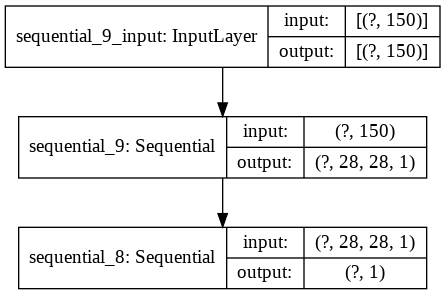

In [ ]:
latent_dimentions = 150

initiate_discrimator= descrimator_section()
initiate_generator= generator_section(latent_dimentions)

GAN_model = combine_generator_disreminator_model(initiate_generator, initiate_discrimator)
GAN_model.summary()
plot_model(GAN_model, show_shapes=True, show_layer_names=True)

In [ ]:
def save_plot(examples, epoch, n=10,path_plot="drive/My Drive/GANS/Gans with PREdefined dataset i.e grey/plots/"):
	
	for i in range(n * n):
		
		pyplot.subplot(n, n, 1 + i)
		
		pyplot.axis('off')
		
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')

	filename = 'generated_plot_e%03d-2nd-round.png' % (epoch+1)
	pyplot.savefig(path_plot+filename)
	pyplot.close()

def status(epoch, g_model, d_model, dataset, latent_dim, n_samples=100,path_weight="drive/My Drive/GANS/Gans with PREdefined dataset i.e grey/weights/"):

	X_real, y_real = produce_real_dataset(dataset, n_samples)

	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	
	x_fake, y_fake = produce_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)

	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	
	save_plot(x_fake, epoch)

	filename = 'generator_model_%03d-2ndround.h5' % (epoch + 1)
	g_model.save(path_weight+filename)



        
def train_GANS(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=500, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	
	for i in range(n_epochs):
		
		for j in range(bat_per_epo):
		
			X_real, y_real = produce_real_dataset(dataset, half_batch)
			
			X_fake, y_fake =produce_fake_samples(g_model, latent_dim, half_batch)
			
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			
			d_loss, _ = d_model.train_on_batch(X, y)
		
			X_gan = generate_latent_space(latent_dim, n_batch)
			
			y_gan = ones((n_batch, 1))
		
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		
		if (i+1) % 5 == 0:
			status(i, g_model, d_model, dataset, latent_dim)        

        

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")
latent_dim = 150

d_model = descrimator_section()

g_model = generator_section(latent_dim)

gan_model = combine_generator_disreminator_model(g_model, d_model)

dataset = loading_dataset()
# traiing
train_GANS(g_model, d_model, gan_model, dataset, latent_dim)
plot_model(GAN_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import pickle 
path_weight="drive/My Drive/GANS/Gans with PREdefined dataset i.e grey/weights/"+"GANS_500_epoch_150_latent.p"
pickle_out= open(path_weight,"wb")  
pickle.dump(train_GANS,pickle_out)
pickle_out.close()

In [29]:
!ls "drive/My Drive/GANS/Gans with PREdefined dataset i.e grey/weights/"

GANS_500_epoch_150_latent.p	 generator_model_195-2ndround.h5
generator_model_005-2ndround.h5  generator_model_200-2ndround.h5
generator_model_010-2ndround.h5  generator_model_205-2ndround.h5
generator_model_015-2ndround.h5  generator_model_210-2ndround.h5
generator_model_020-2ndround.h5  generator_model_215-2ndround.h5
generator_model_025-2ndround.h5  generator_model_220-2ndround.h5
generator_model_030-2ndround.h5  generator_model_225-2ndround.h5
generator_model_035-2ndround.h5  generator_model_230-2ndround.h5
generator_model_040-2ndround.h5  generator_model_235-2ndround.h5
generator_model_045-2ndround.h5  generator_model_240-2ndround.h5
generator_model_050-2ndround.h5  generator_model_245-2ndround.h5
generator_model_055-2ndround.h5  generator_model_250-2ndround.h5
generator_model_060-2ndround.h5  generator_model_255-2ndround.h5
generator_model_065-2ndround.h5  generator_model_260-2ndround.h5
generator_model_070-2ndround.h5  generator_model_265-2ndround.h5
generator_model_075-2ndround.

In [26]:

from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot
 

def generate_latent_points(latent_dim, n_samples):

	x_input = randn(latent_dim * n_samples)

	x_input = x_input.reshape(n_samples, latent_dim)

	return x_input
 

latent_points = generate_latent_points(150, 20)

print(latent_points.shape)

print(latent_points)


(20, 150)
[[-0.68163837 -0.38391126 -0.26660504 ...  0.64794319 -2.00958353
  -1.20627883]
 [-0.29422595 -2.07998902 -1.39943628 ... -1.72936858 -0.64530208
   0.17022685]
 [-0.35786935  0.55492004  1.18476361 ... -1.15406195 -0.06566474
   0.66555378]
 ...
 [-0.08487285  1.21248251  0.1730126  ... -0.20707858  0.23471628
  -0.64174325]
 [-1.39230208 -0.03679762 -1.71988374 ... -1.0985573  -0.22748094
  -0.23328569]
 [ 0.11055795 -1.68863543 -0.6441218  ...  0.39184479 -0.13196641
   0.50675294]]


(20, 28, 28, 1)


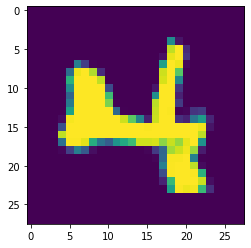

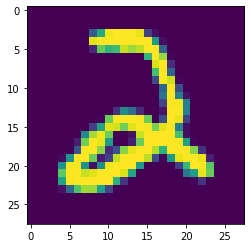

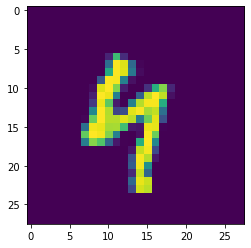

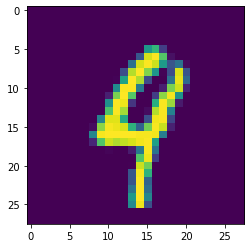

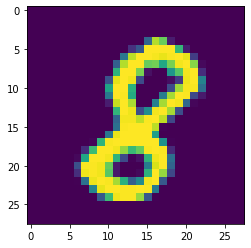

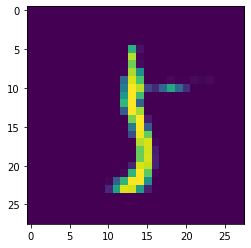

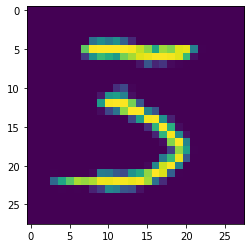

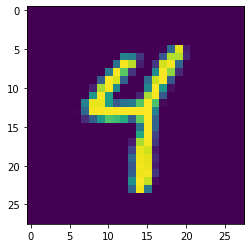

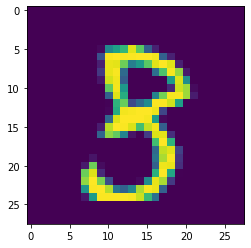

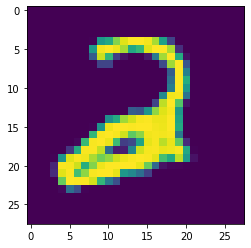

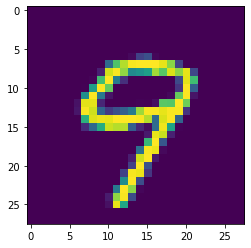

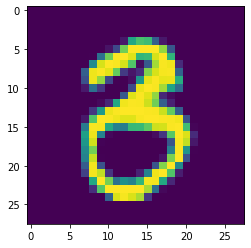

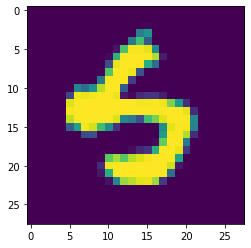

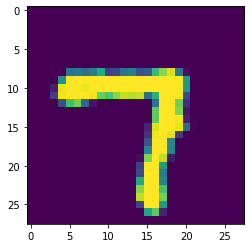

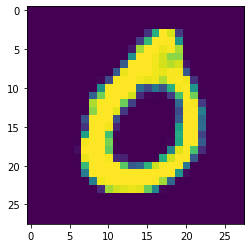

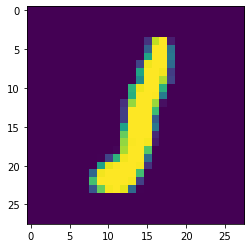

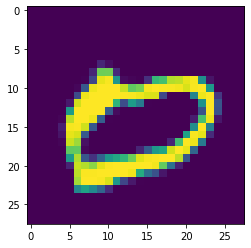

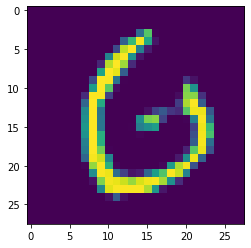

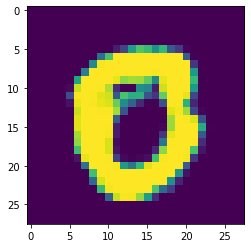

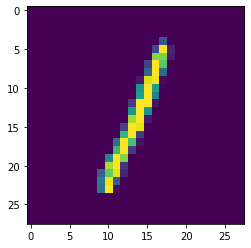

In [30]:
model = load_model("drive/My Drive/GANS/Gans with PREdefined dataset i.e grey/weights/generator_model_385-2ndround.h5")

images= model.predict(latent_points)
print(images.shape)
# cmap='viridis'
import matplotlib.pyplot as plt

for i in images:

    a=i.reshape(28,28)
    plt.imshow(a,cmap='viridis')
    plt.show()

In [45]:

jovian.commit(message="GANS MNIST SAMPLE", files=["drive/My Drive/GANS/Gans with PREdefined dataset i.e grey/weights/generator_model_385-2ndround.h5","drive/My Drive/GANS/Gans with PREdefined dataset i.e grey/plots/discriminator_plot.png","drive/My Drive/GANS/Gans with PREdefined dataset i.e grey/plots/gan_plot.png","drive/My Drive/GANS/Gans with PREdefined dataset i.e grey/plots/generator_plot.png","drive/My Drive/GANS/Gans with PREdefined dataset i.e grey/plots/generated_plot_e385-2nd-round.png"],
              output=[], environment='auto', privacy="public", filename=None, project="tiwari12-rst/GANS-101")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/tiwari12-rst/gans-101


'https://jovian.ml/tiwari12-rst/gans-101'

In [32]:
!ls "drive/My Drive/GANS/Gans with PREdefined dataset i.e grey/plots/"

discriminator_plot.png		   generated_plot_e195-2nd-round.png
gan_plot.png			   generated_plot_e200-2nd-round.png
generated_plot_e005-2nd-round.png  generated_plot_e205-2nd-round.png
generated_plot_e010-2nd-round.png  generated_plot_e210-2nd-round.png
generated_plot_e015-2nd-round.png  generated_plot_e215-2nd-round.png
generated_plot_e020-2nd-round.png  generated_plot_e220-2nd-round.png
generated_plot_e025-2nd-round.png  generated_plot_e225-2nd-round.png
generated_plot_e030-2nd-round.png  generated_plot_e230-2nd-round.png
generated_plot_e035-2nd-round.png  generated_plot_e235-2nd-round.png
generated_plot_e040-2nd-round.png  generated_plot_e240-2nd-round.png
generated_plot_e045-2nd-round.png  generated_plot_e245-2nd-round.png
generated_plot_e050-2nd-round.png  generated_plot_e250-2nd-round.png
generated_plot_e055-2nd-round.png  generated_plot_e255-2nd-round.png
generated_plot_e060-2nd-round.png  generated_plot_e260-2nd-round.png
generated_plot_e065-2nd-round.png  generated_plot_e265-2nd-